In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# Enable inline plotting
%matplotlib inline

In [17]:
# Load the dataset
housing=pd.read_csv('Housing.csv')

In [18]:
housing.shape

(545, 13)

In [19]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


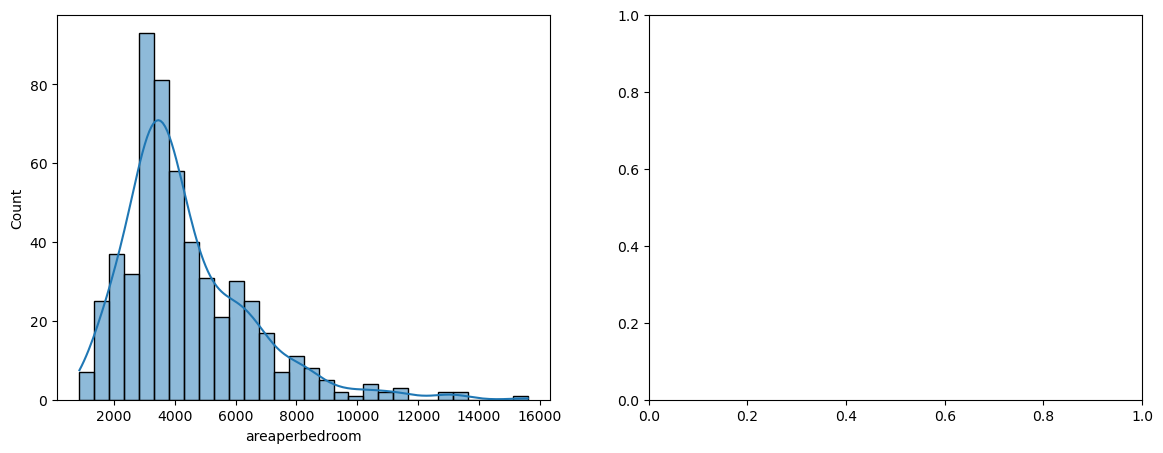

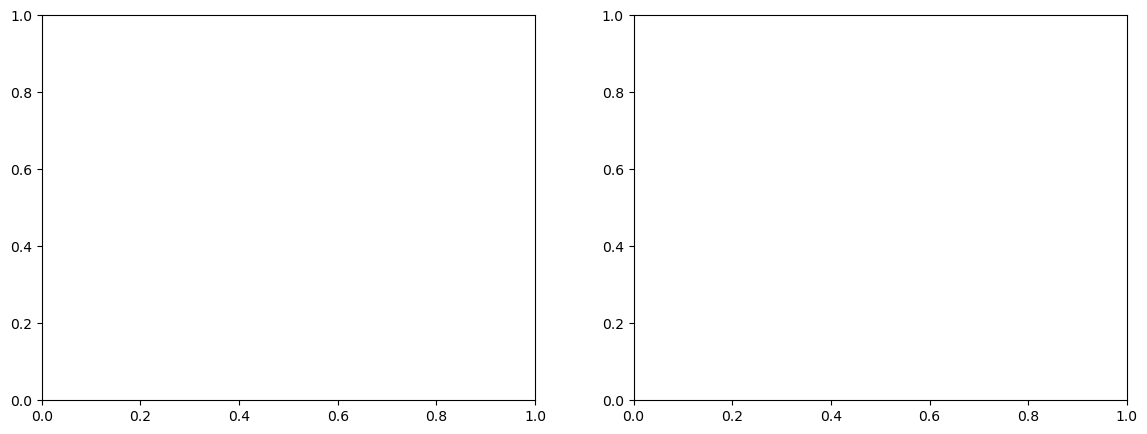

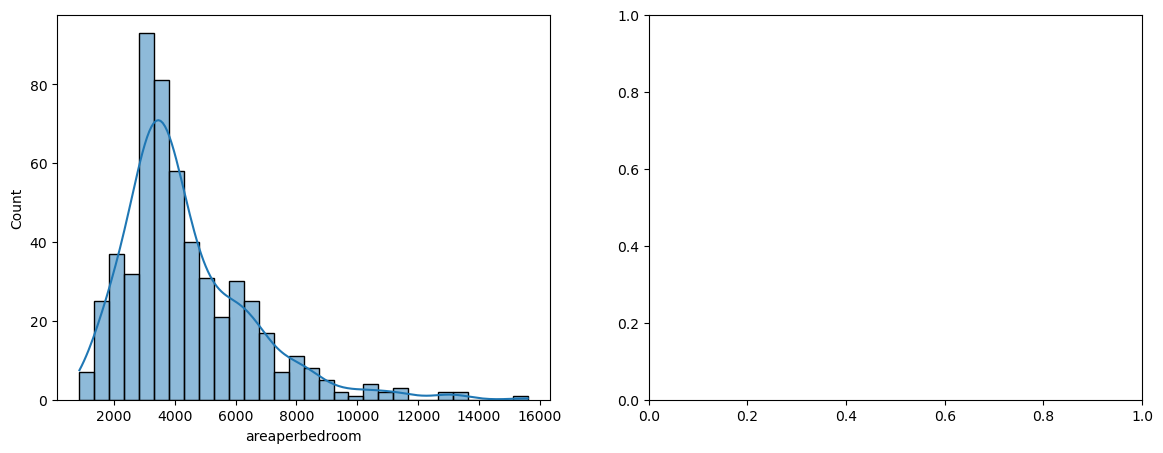

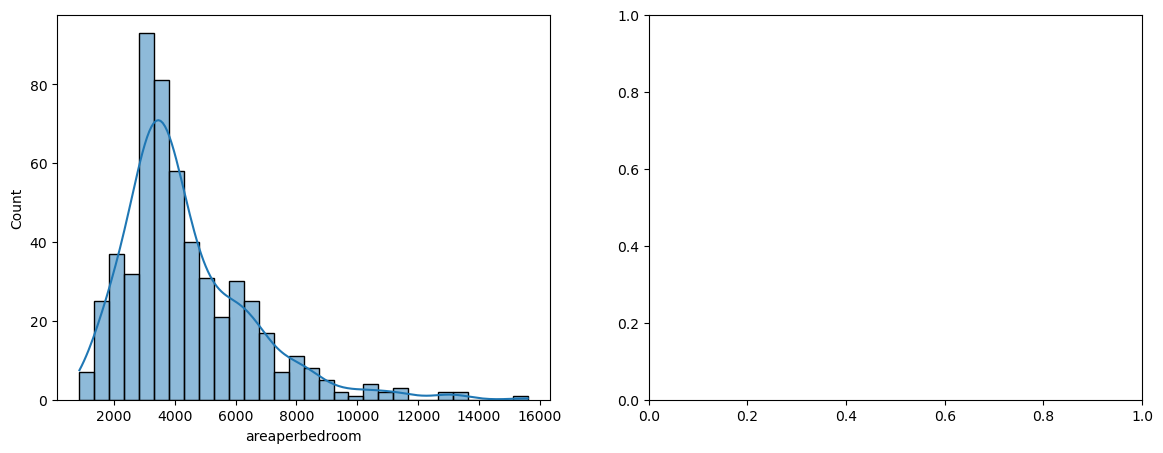

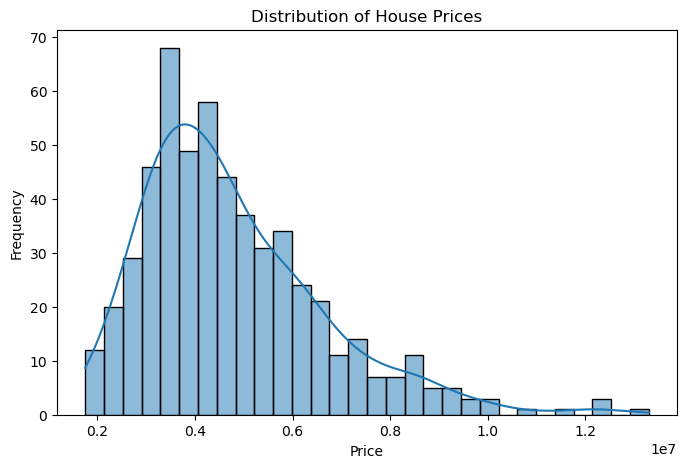

In [ ]:
# Distribution of target variable (price)
plt.figure(figsize=(8,5))
sns.histplot(housing['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

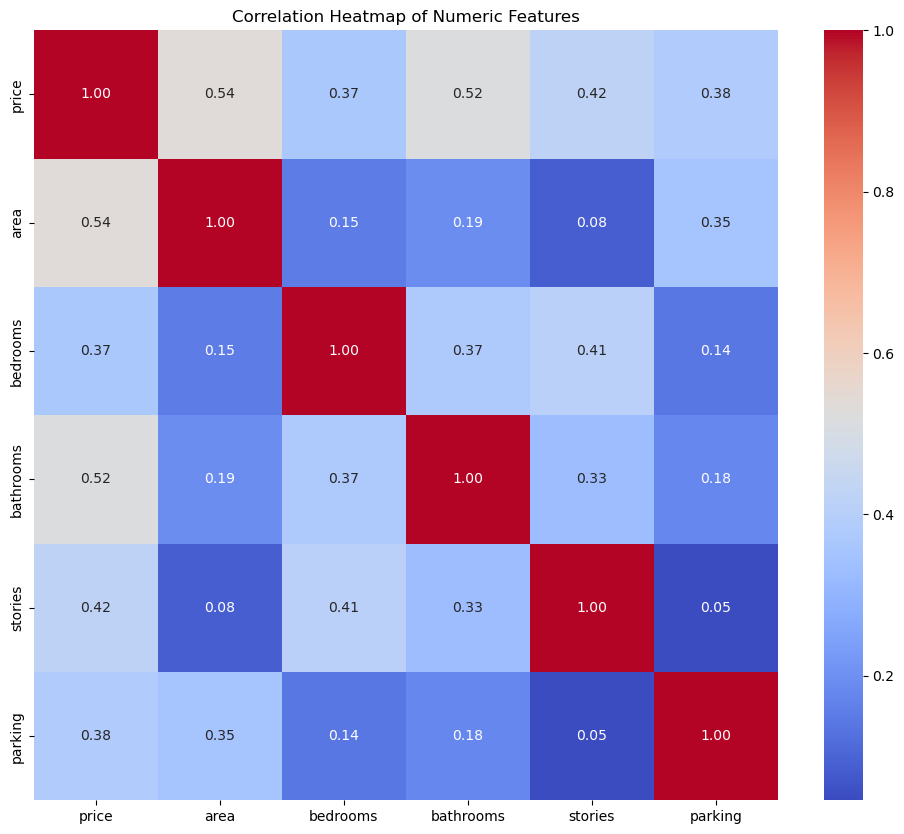

In [6]:
# Correlation heatmap
plt.figure(figsize=(12,10))
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [21]:
# Convert binary categorical columns ('yes'/'no') to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    housing[col] = housing[col].map({'yes': 1, 'no': 0})

# One-hot encode 'furnishingstatus'
furnishing_dummies = pd.get_dummies(housing['furnishingstatus'], drop_first=True).astype(int)
housing = pd.concat([housing.drop('furnishingstatus', axis=1), furnishing_dummies], axis=1)

In [8]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [22]:
housing['areaperbedroom']=housing['area']/housing['bathrooms']

In [23]:
housing['bbratio']=housing['bathrooms']/housing['bedrooms']

In [24]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,3710.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,4980.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,3750.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,7420.0,0.250000


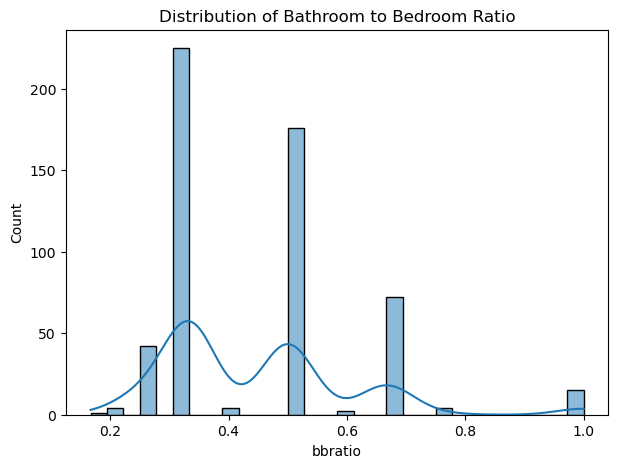

In [28]:
plt.figure(figsize=(7,5))
sns.histplot(housing['bbratio'], bins=30, kde=True)
plt.title('Distribution of Bathroom to Bedroom Ratio')
plt.show()

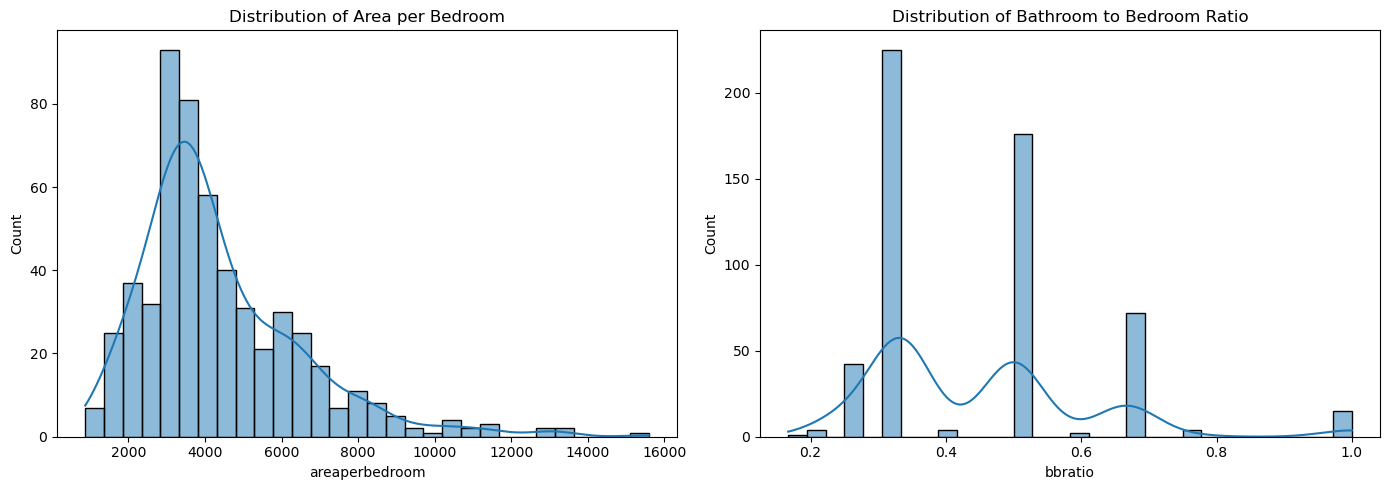

In [29]:
# Visualize added features distribution
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(housing['areaperbedroom'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Area per Bedroom')  # Changed from axes.set_title to axes[0].set_title
sns.histplot(housing['bbratio'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Bathroom to Bedroom Ratio')
plt.tight_layout()
plt.show()


In [30]:
X = housing.drop(['price'], axis=1)
y = housing['price']

In [31]:
X = X.select_dtypes(include=[np.number])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape}")

Training set size: 436, Test set size: (109, 15)


In [34]:
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=10)

In [35]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [36]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['bathrooms', 'stories', 'mainroad', 'guestroom', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'unfurnished', 'bbratio'],
      dtype='object')


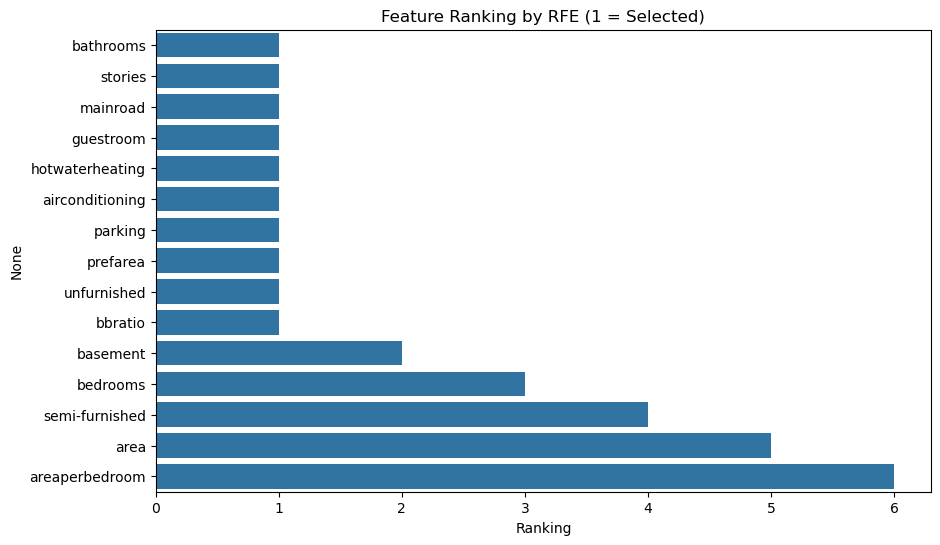

In [37]:
feature_ranking = pd.Series(rfe.ranking_, index=X_train.columns).sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=feature_ranking.values, y=feature_ranking.index)
plt.title('Feature Ranking by RFE (1 = Selected)')
plt.xlabel('Ranking')
plt.show()

In [38]:
lr.fit(X_train[selected_features], y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test[selected_features])

In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [42]:
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 1,410,020.80
R² Score: 0.6067


## Plot Actual vs Predicted Prices

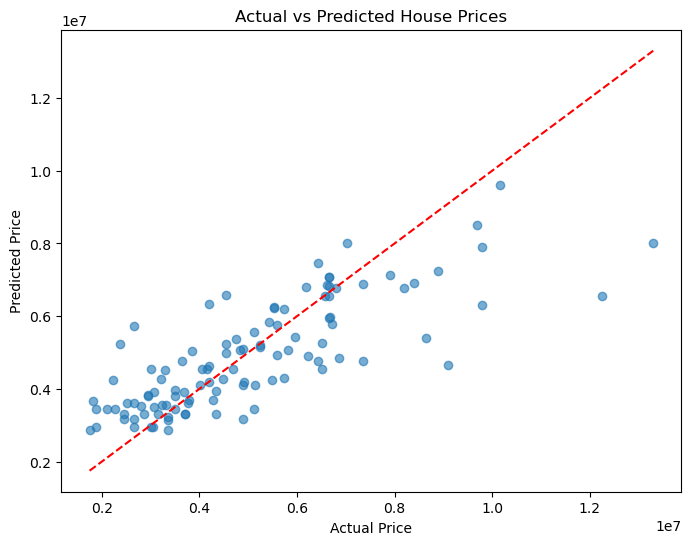

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

## Residuals Plot to check errors

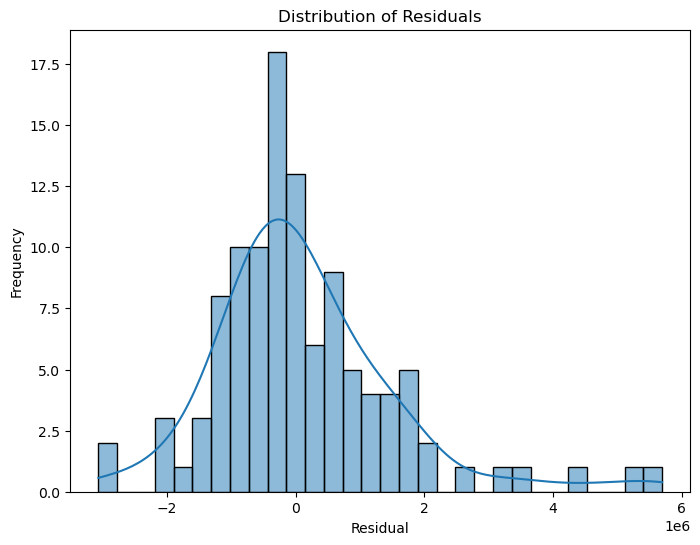

In [44]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()